In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_all = pd.read_csv("https://assets.datacamp.com/production/repositories/1765/datasets/ae888d00f9b36dd7d50a4afbc112761e2db766d2/turnover.csv")
data_all.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
department = pd.get_dummies(data_all.department)   ## investigamos la columna
department.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [4]:
department = department.drop("technical",axis=1)   #eliminamos los tecnicos, ya que no aportan
department.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


In [5]:
data = data_all.drop("department",axis=1)      #eliminamos la columna entera, ya que no aporta
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low


In [6]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')
#Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])
#Encode observations as codes, not labels
data.salary = data.salary.cat.codes      # convierte a variables 0,1,2

In [7]:
data.salary.head()

0    0
1    1
2    1
3    0
4    0
Name: salary, dtype: int8

In [8]:
corr_matrix= data.corr()
corr_matrix

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_of_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
churn,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


In [9]:
#Veo la variable objetivo y las que son predictoras
target = data.churn
features = data.drop("churn",axis=1)   

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Separo el set de entrenamiento y el de testeo    con 25% para el test y 75 para el training
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Apply Decision Tree model to fit Features to the Target
#creo 3 modelos, con distintos parámetros
model = DecisionTreeClassifier(random_state=42)
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)          
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

In [14]:
#los fiteo
model.fit(features_train,target_train)
model_depth_5.fit(features_train,target_train)
model_sample_100.fit(features_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [15]:
#otro modelo con probabilidades balanceadas
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

In [16]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

In [17]:
# Export the tree to a dot file
export_graphviz(model,"./Recursos/tree_churn_model_HR.dot")
#(paste this file into http://www.webgraphviz.com/)  

In [18]:
#para no pegarlo en la pagina, lo imprimiremos en pantalla
import os
from graphviz import Source

In [19]:
file = open("Recursos/tree_churn_model_HR.dot","r")
text = file.read()
#Source(text)  # descomentar para ver el arbol

In [20]:
#Calculating precision score, recall and specifity
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [21]:
#basing on the training model make prediction about test model
model.fit(features_train,target_train)          #basados en el modelo de entremiento generamos las predicciones
prediction = model.predict(features_test)       # del test de prueba

In [22]:
# Calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction), recall_score(target_test, prediction), roc_auc_score(target_test, prediction)

(0.935064935064935, 0.9632107023411371, 0.9710901040622616)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.98333333 0.982      0.97333333 0.96266667 0.95733333 0.974
 0.988      0.992      1.         1.        ]


In [50]:
print("el valor de R^2 es: ", np.mean(cross_val_score(model,features,target,cv=10)))

el valor de R^2 es:  0.9812666666666667


In [26]:
# Generate values for maximum depth  
depth = [i for i in range(5,21,1)]     # generamos un rango de valores para la profundidad

In [27]:
# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]    #generamos valores para el rango de muestras

In [28]:
# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)
parameters

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350, 400, 450]}

**I can now use the sklearn GridSearchCV() function to find the best combination of all of the max_depth and min_samples_leaf values you generated in the previous exercise.**

In [29]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

In [30]:
# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters)

In [31]:
# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,

In [32]:
# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [33]:
#seteamos nuevamente los parámetos
max_depth=param_search.best_params_['max_depth']
min_sample=param_search.best_params_['min_samples_leaf']

In [34]:
# creamos el nuevo modelo con los parámetros mejores
model_best = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_sample,random_state=42)
model_best.fit(features_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [35]:
# Calculate feature importances
feature_importances = model_best.feature_importances_
feature_importances

array([5.51889109e-01, 1.44433585e-01, 9.30431506e-02, 5.34156589e-02,
       1.56987233e-01, 0.00000000e+00, 0.00000000e+00, 2.31263451e-04])

In [36]:
# Create a list of features: done
feature_list = list(features)
feature_list

['satisfaction',
 'evaluation',
 'number_of_projects',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion',
 'salary']

In [37]:
# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

In [38]:
# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.551889
time_spend_company,0.156987
evaluation,0.144434
number_of_projects,0.093043
average_montly_hours,0.053416
salary,0.000231
work_accident,0.000000
promotion,0.000000


In [39]:
# select only features with relative importance higher than 1%, los datos anteriores son porcentajes/100
selected_features = relative_importances[relative_importances.importance>0.01]

In [40]:
# create a list from those features: done
selected_list = selected_features.index

In [41]:
# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]
features_test_selected

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company
6723,0.65,0.96,5,226,2
6473,0.88,0.80,3,166,2
4679,0.69,0.98,3,214,2
862,0.41,0.47,2,154,3
7286,0.87,0.76,5,254,2
...,...,...,...,...,...
10371,0.99,0.37,6,219,6
12541,0.81,0.87,4,254,5
2656,0.67,0.59,3,177,3
6759,0.22,0.57,5,174,6


In [42]:
#last model
model_best.fit(features_train_selected,target_train)
export_graphviz(model_best,"./Recursos/Best-tree-Churn.dot")

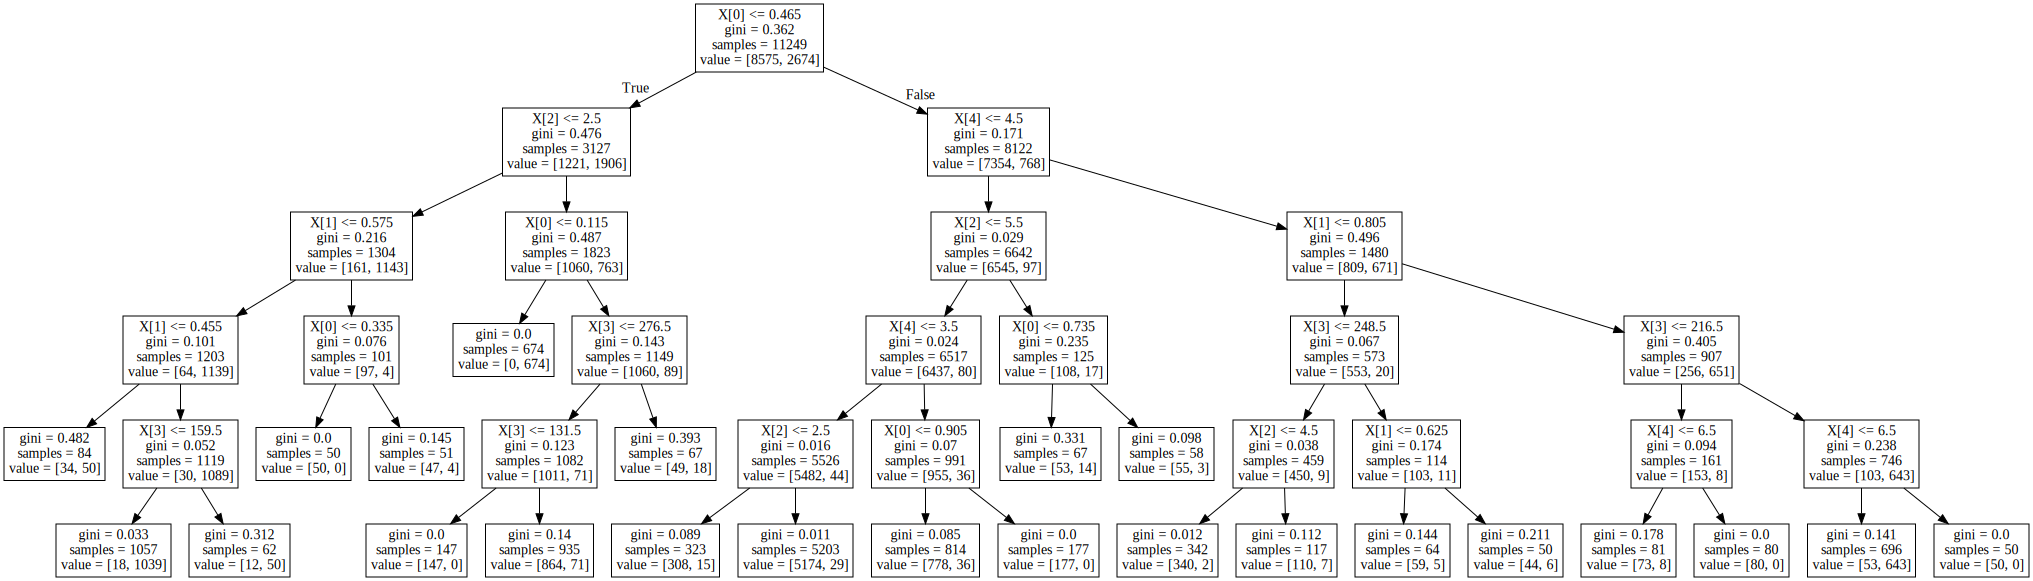

In [43]:
file = open("Recursos/Best-tree-Churn.dot","r")
text = file.read()
Source(text)  # descomentar para ver el arbol

In [44]:
model_best.feature_importances_

array([0.55189237, 0.14443444, 0.0930437 , 0.05341597, 0.15721351])

In [45]:
sum(data_all[(data_all.satisfaction<=0.115) & (data_all.evaluation<=2.5)].churn)

888

In [46]:
data_final= data[selected_list]
prediccion =  model_best.predict(data_final)
data["prediccion"] = prediccion
data[["prediccion","churn"]]

,prediccion,churn
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
14994,1,1
14995,1,1
14996,1,1
14997,1,1


In [55]:
# Calculate precision score by comparing target_test with the prediction
precision_score(data["churn"], prediccion)

0.9511201629327902